In [1]:
import torch, torchvision, PIL, numpy as np
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import pandas as pd
import pdb
import numpy as np
import cv2
import random
import os

In [2]:
from PIL import Image

In [3]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/vocabulary_semantic.txt

--2021-05-16 23:38:45--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/vocabulary_semantic.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33921 (33K) [text/plain]
Saving to: ‘vocabulary_semantic.txt’

vocabulary_semantic 100%[===================>]  33.13K  --.-KB/s    in 0s      

2021-05-16 23:38:45 (135 MB/s) - ‘vocabulary_semantic.txt’ saved [33921/33921]



In [4]:
# You can get more datasets here https://repository.cloudlab.zhaw.ch/artifactory/deepscores/archives/2017/
!wget https://grfia.dlsi.ua.es/primus/packages/primusCalvoRizoAppliedSciences2018.tgz
!wget https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz

--2021-05-16 23:38:45--  https://grfia.dlsi.ua.es/primus/packages/primusCalvoRizoAppliedSciences2018.tgz
Resolving grfia.dlsi.ua.es (grfia.dlsi.ua.es)... 193.145.231.49
Connecting to grfia.dlsi.ua.es (grfia.dlsi.ua.es)|193.145.231.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273645577 (261M) [application/x-gzip]
Saving to: ‘primusCalvoRizoAppliedSciences2018.tgz’

primusCalvoRizoAppl 100%[===================>] 260.97M  9.30MB/s    in 26s     

2021-05-16 23:39:12 (9.93 MB/s) - ‘primusCalvoRizoAppliedSciences2018.tgz’ saved [273645577/273645577]

--2021-05-16 23:39:12--  https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz
Resolving grfia.dlsi.ua.es (grfia.dlsi.ua.es)... 193.145.231.49
Connecting to grfia.dlsi.ua.es (grfia.dlsi.ua.es)|193.145.231.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436130024 (2.3G) [application/x-gzip]
Saving to: ‘CameraPrIMuS.tgz’

CameraPrIMuS.tgz    100%[===================>]   2.27G  10.5

In [5]:
!tar -xvf CameraPrIMuS.tgz 
!tar -xvf primusCalvoRizoAppliedSciences2018.tgz 

Streaming output truncated to the last 5000 lines.
./package_ab/201008631-1_1_2/201008631-1_1_2.agnostic
./package_ab/201008631-1_1_2/201008631-1_1_2.semantic
./package_ab/201008631-1_1_2/._201008631-1_1_2.mei
./package_ab/201008631-1_1_2/201008631-1_1_2.mei
./package_ab/201008631-1_1_2/._201008631-1_1_2.mid
./package_ab/201008631-1_1_2/201008631-1_1_2.mid
./package_ab/201008631-1_1_2/._201008631-1_1_2.png
./package_ab/201008631-1_1_2/201008631-1_1_2.png
./package_ab/201008631-1_1_2/._regular_pae.pae
./package_ab/201008631-1_1_2/regular_pae.pae
./package_ab/150205116-1_1_1/150205116-1_1_1.agnostic
./package_ab/150205116-1_1_1/150205116-1_1_1.semantic
./package_ab/150205116-1_1_1/._150205116-1_1_1.mei
./package_ab/150205116-1_1_1/150205116-1_1_1.mei
./package_ab/150205116-1_1_1/._150205116-1_1_1.mid
./package_ab/150205116-1_1_1/150205116-1_1_1.mid
./package_ab/150205116-1_1_1/._150205116-1_1_1.png
./package_ab/150205116-1_1_1/150205116-1_1_1.png
./package_ab/150205116-1_1_1/._regular_pa

In [6]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/ctc_utils.py
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/primus.py 

--2021-05-16 23:48:57--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/ctc_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4225 (4.1K) [text/plain]
Saving to: ‘ctc_utils.py’

ctc_utils.py        100%[===================>]   4.13K  --.-KB/s    in 0s      

2021-05-16 23:48:57 (44.0 MB/s) - ‘ctc_utils.py’ saved [4225/4225]

--2021-05-16 23:48:57--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/primus.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6010 (5.9K) [text/plain]
Savin

In [7]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/train.txt
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/test.txt

--2021-05-16 23:48:57--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1265381 (1.2M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.21M  --.-KB/s    in 0.02s   

2021-05-16 23:48:58 (67.0 MB/s) - ‘train.txt’ saved [1265381/1265381]

--2021-05-16 23:48:58--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143357 (140K) [text/p

In [8]:
!wget https://raw.githubusercontent.com/meijieru/crnn.pytorch/master/models/crnn.py

--2021-05-16 23:48:58--  https://raw.githubusercontent.com/meijieru/crnn.pytorch/master/models/crnn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2554 (2.5K) [text/plain]
Saving to: ‘crnn.py’

crnn.py             100%[===================>]   2.49K  --.-KB/s    in 0s      

2021-05-16 23:48:58 (61.8 MB/s) - ‘crnn.py’ saved [2554/2554]



In [9]:
from crnn import CRNN as crnn

In [10]:
class MusicClassificationObject:

  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, transform=None, distortions=False):
        self.distortions = distortions
        self.dataset_dir = dataset_dir
        self.transform = transform 

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0

        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r') #vocabulary_semantic.txt
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word #like hash
          word_idx += 1 

        dict_file.close()

        self.dataset, self.imgPath, self.name = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    imgPath = []
    name = []
    i = 0
    for sample in dataset_list: #train.txt
      name.append(sample)
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split() #list
      sample_gt_file.close()
      # (img file name, all the notations sequentially related to the file)
      dataset.append((sample_filepath + '.png', [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
      imgPath.append(sample_filepath + '.png')
    return dataset, imgPath, name

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
      if torch.is_tensor(i):
          i = i.item()
      imgfn, label = self.dataset[i]
      img = PIL.Image.open(imgfn)
      if self.transform:
          img = self.transform(img)
      return (img, label)

  def getImg(self, i):
      imgfn, label = self.dataset[i]
      img = PIL.Image.open(imgfn)
      return (img, label)
  
  def getPath(self, i):
      return self.imgPath[i]

  def getName(self, i):
      return self.name[i]


In [11]:
os.chdir('/content')
xform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
music_dataset = MusicClassificationObject('Corpus', 'train.txt', 'vocabulary_semantic.txt', xform)

In [12]:
music_dataset.getPath(156)

'Corpus/000101455-1_1_1/000101455-1_1_1.png'

In [13]:
music_dataset.getImg(156)

(<PIL.PngImagePlugin.PngImageFile image mode=P size=2002x157 at 0x7F719FE12B50>,
 [10,
  228,
  1780,
  1059,
  0,
  1064,
  1727,
  1730,
  453,
  0,
  447,
  1727,
  1730,
  1467,
  0,
  1459,
  1730,
  460,
  1671,
  1477,
  1232,
  0,
  1036,
  1019,
  1044,
  1467,
  1452,
  1477,
  0])

(-0.5, 2001.5, 156.5, -0.5)

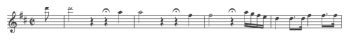

In [14]:
plt.imshow(music_dataset.getImg(156)[0])
plt.axis('off')

In [15]:
music_dataset[156]
#len(music_dataset)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 [10,
  228,
  1780,
  1059,
  0,
  1064,
  1727,
  1730,
  453,
  0,
  447,
  1727,
  1730,
  1467,
  0,
  1459,
  1730,
  460,
  1671,
  1477,
  1232,
  0,
  1036,
  1019,
  1044,
  1467,
  1452,
  1477,
  0])

In [16]:
len(music_dataset)

78755

In [17]:
def show_img(sample, title=None):
    img, _ = sample
    if torch.is_tensor(img):
        img = img.cpu().permute(1,2,0)
    #img = cv2.cvtColor(img[:,:,0], cv2.COLOR_BGR2RGB)
    #image = np.array(img)
    #pixels = np.array(img)
    plt.imshow(img[:,:,0], cmap='gist_gray') #img[:,:,0]
    if title:
        plt.title(title) # add color='w' arg if using a dark background
    plt.axis('off')

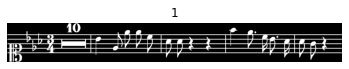

In [18]:
show_img(music_dataset[0], title=1)

Notes Splitting (High-lights Lines)

In [19]:
def remove_white(imagePath, first, wantnp = False): #works only for printed music scores
  if (first[0:6] == 'clef-F' or first[0:6] == 'clef-C'):
    special = 1
  else:
    special = 0
  
  theIm = Image.open(imagePath, 'r')
  thePix = theIm.load()
  pim = np.array(theIm)
  hh, ww = pim.shape
  checkk = 0
  ref = []
  for j in range(hh):
    thePix[1,j] = 0
    thePix[0,j] = 0
    ref.append(thePix[3,j])

  #get "density" here
  upper = 0
  lower = 0
  counter = 0
  for i in range(hh):
    if(ref[i] == 1):
      upper = i
      break
  
  for i in range(hh):
    if(ref[hh - 1 - i] == 1):
      lower = hh - 1 - i
      break

  for i in range(upper, lower + 1):
    if(ref[i] == 1):
      counter += 1
  
  height = lower - upper + 1 #important.....
  density = counter / height
  #density ends here

  #remove white space purely
  modi = []
  count = 0
  for k in range(ww-1):
    for j in range(hh):
      if (ref[j] != thePix[k,j]):
        checkk = 1
        break
    
    if (checkk == 0):
      modi.append(1)
      count = count + 1
      for z in range(hh):
        thePix[k, z] = 0
    else:
      modi.append(0)
    checkk = 0
  
  checkk = 0

  #last col
  for j in range(hh):
    if (thePix[k+1,j] != 0):
        checkk += 1
    
  if (checkk <= 10):
      modi.append(1)
      count = count + 1
      for z in range(hh):
        thePix[ww - 1, z] = 0
  else:
      modi.append(0)
  checkk = 0

  itt = modi[6:-6]
  indexx = 0
  for i in range(len(itt)):
    should = 0

    #print(i)
    #print(len(itt))
    if (modi[i + 6] == 0 and modi[i + 6 + 1] == 1): #i + 1 --> j - 1
      for j in range(5):
        if (modi[i + 1 + 6 + j] == 0): #may have bug here...
          index = i + j
          should = 1
    if (should == 1):
      for q in range(i + 1 + 6, index + 1 + 6):
        for z in range(hh):
          thePix[q, z] = ref[z]
    should = 0

  #need to be changed
  if wantnp:
    return np.array(theIm) #as a whole

  else:
    imgArray = []
    index = 0
    yes = 0
    goodd = 0
    through = 0
    for i in range(3, ww):
      if (modi[i] == 0 and goodd == 0):
        goodd = 1

      if (special == 1 and goodd == 1):
        yes = 1
        index += 1
        if (modi[i] == 0 and through == 0):
          through = 1
        elif (modi[i] == 1 and through == 1):
          through = 2
        elif (modi[i] == 0 and through == 2):
          special = 0
      elif (modi[i] == 0 and special == 0):
        yes = 1
        index += 1
      else:
        if (yes == 1):
          yes = 0
          copyImg = theIm.copy()
          cropped = copyImg.crop((i - index - 1, 0, i, hh)) #cropped = copyImg.crop((i - index - 1, 0, i, hh))
          imgArray.append(cropped)
          index = 0

    newerArray = []
    index2 = 0

    #clean whole white col on left and right
    wt = []
    counter = 0

    newst = []

    for i in range(hh):
      wt.append(0)

    for i in range(len(imgArray)):
      pica = imgArray[i].load()
      pimc = np.array(imgArray[i])
      hhc, wwc = pimc.shape

      lb = 0
      rb = wwc
      ckk = 0

      for j in range(wwc):
        ck = 0

        for k in range(hhc):
          if (ck == 0 and pica[j, k] != wt):
            ck = 1 #this row, not white
            break

        if (ck == 1 and ckk == 0): #in this col --> not white
            lb = j + 1
        
        elif (ckk == 1 and ck == 0):
            rb = j
        ckk = 1
      
      newst.append(imgArray[i].crop((lb, 0, rb, hhc)))

    newstt2 = []
    sthh = []

    newstt2.append(newst[0])
    sthh.append(0)

    for i in range(1, len(newst)):
      
      resultt = horSplit(newst[i], oneChannel = True)
      if (len(resultt) == 1):
        newstt2.append(newst[i]) #newstt2.append(newst[i])
        sthh.append(1)
      else:
        for j in range(len(resultt)):
          newstt2.append(resultt[j])
          sthh.append(0)

    #problem here!     

    for i in range(len(newstt2)):
      if (sthh[i] == 0):
        newerArray.append(newstt2[i])
      else:
        ColCounter, place, numPix, hhh, www = getCol(newstt2[i], upper, lower)
        
        if (ColCounter >= 2):
          length = place[-1] - place[0] + 1
          totalSpace = length * height
          if ((numPix >= 0.25 * 0.8 * totalSpace) and (numPix <= 0.65 * totalSpace) and (lower - upper + 1 <= www)): #multi..
            index2 = 0
            NumCut = ColCounter - 1
            cutSpace = (int)(length / NumCut)
            for z in range (NumCut):
              copyImg = newstt2[i].copy()
              cropped = copyImg.crop((index2, 0, index2 + cutSpace, hhh))
              newerArray.append(cropped)
              index2 = index2 + cutSpace
            copyImg = newstt2[i].copy()
            cropped = copyImg.crop((index2, 0, www, hhh))
            newerArray.append(cropped)
          else:
            newerArray.append(newstt2[i])
        else:
          newerArray.append(newstt2[i])

    return newerArray

In [20]:
def horSplit(imgPath, oneChannel = False, devi = 0): #the bigger devi is, the more tolerance allowed for the pixel to be considered as the same color
  imgg = imgPath.copy()
  thePix = imgg.load()
  pim = np.array(imgg)
  hh, ww = pim.shape

  row0 = []
  row1 = []

  col2 = []
  col = []

  toReturn = []

  for i in range(ww):
    row0.append(0)
    row1.append(1)

  for i in range(hh):
    col.append(0)
    col2.append(0)

  cc = 0

  c0 = 0
  c1 = 0
  for i in range(hh):
    for j in range(ww):
      if (oneChannel):
        if (thePix[j, i] != row0[j] and c0 == 0):
          c0 = 1
        if (thePix[j, i] != row1[j] and c1 == 0):
          c1 = 1

    if (c0 == 1 and c1 == 1):
      col[i] = 1
    elif (c0 == 1):
      col[i] = 2
      
    c0 = 0
    c1 = 0
  
  check = 0
  ub = 0
  group = []
  tho = 0

  for i in range(len(col)):
    if ((col[i] == 1 or col[i] == 2) and check == 0):
      if (col[i] == 2):
        group.append((i, hh))
        break
      check = 1
      ub = i
    elif (col[i] == 0 and check == 1):
      check = 0
      group.append((ub, i)) #looks good
    elif (check == 1 and col[i] == 2): #note touches staff line
      group.append((ub, hh))
      break
  
  conti = 0
  length = 0
  maxlength = 0
  match = []

  counter = 0
  no = 1

  for i in range(group[-1][0], group[-1][1]):
    if (col[i] != 0 and col[i] != 2):
      no = 0
      break

  if (no == 1 and len(group) > 1):
    group = group[:-1]
    group[-1] = (group[-1][0], hh)

  for i in range(len(group)):

      upb = group[i][0]
      lob = group[i][1]
      
      copyImg = imgg.copy()
      cropped = copyImg.crop((0, upb, ww, lob))
      toReturn.append(cropped)

    
  return toReturn

In [21]:
def getCol(img, upper, lower):
  theIm = img.copy()
  height = lower - upper + 1
  thePix = theIm.load()
  pim = np.array(theIm)
  hh, ww = pim.shape
  isCol = []
  theSameCol = 0
  currentLen = 0
  maxLen = 0
  test = []
  for i in range(ww):
    currentLen = 0
    maxLen = 0
    test = []
    for j in range(0, hh): #j in range(upper, lower + 1): 
      if (thePix[i,j] == 1):
        currentLen += 1
        #test.append(currentLen)
        #print(currentLen)
      else:
        #test.append(currentLen)
        if (maxLen < currentLen):
          maxLen = currentLen
        currentLen = 0
    #print(maxLen)
    if (maxLen < currentLen):
        maxLen = currentLen
    currentLen = 0
    if (maxLen >= (int)(0.5 * height)): #(int)(0.5 * height)) #change? 
      isCol.append(1)
    else:
      isCol.append(0)
    #print(test)
  
  ColCounter = 0
  place = []
  incase = 0
  for i in range(len(isCol)):
    incase = 0
    if (isCol[i] == 1 and theSameCol == 0):
      theSameCol = 1
      incase += 1
      ColCounter += 1
    elif (isCol[i] == 0 and theSameCol == 1):
      theSameCol = 0
      if (incase < 6): #change?
        place.append(i)
      incase = 0

  if (theSameCol == 1):
    place.append(i)
  
  numPix = 0
  if (len(place) >= 2):
    for i in range(place[0], place[-1]):
      for j in range(upper, lower + 1):
        if (thePix[i,j] == 1):
          numPix += 1

  return ColCounter, place, numPix, hh, ww

In [22]:
def connectImg(imgArray, filter, show = False):
  theIm = imgArray[0].copy()
  pim = np.array(theIm)
  hh, ww = pim.shape

  white = np.zeros([hh,10,1],dtype=np.uint8) #how many channels..
  white.fill(0)

  npp = np.array(imgArray[0])
  working = cv2.hconcat([npp, white])

  for i in range(1, len(imgArray)):
    npp = np.array(imgArray[i])
    onGoing = cv2.hconcat([npp, white])
    working = cv2.hconcat([working, onGoing])  

  if show:
    plt.imshow(working, filter)
  return working



---



In [23]:
class MusicClassificationLineSplitted: #shouldSplit -> false = use connectImg func; in2DArray -> False = image being delievered one by one
  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, music_dataset, distortions=False, shouldSplit = False, in2DArray = True, transform = None):
        self.distortions = distortions
        self.dataset_dir = dataset_dir
        self.shouldSplit = shouldSplit
        self.transform = transform

        self.in2DArray = in2DArray

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0

        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r') #vocabulary_semantic.txt
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word #like hash
          word_idx += 1 

        dict_file.close()

        self.dataset = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    imgPath = []
    splitPath = []
    ittem = []
    shouldSplit = self.shouldSplit
    in2DArray = self.in2DArray
    i = 0
    for sample in dataset_list: #train.txt
      sample_getPath = self.dataset_dir + 'Splitted' + '/' + sample + 'Split'
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_path = sample_filepath + '.png'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split() #list
      first = sample_gt_plain[0]
      sample_gt_file.close()
      imageee = createItem(sample, sample_path, i, shouldSplit, first)
      # (img file name, all the notations sequentially related to the file)
      if (shouldSplit == False):
        dataset.append((imageee, [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
      else:
        if (in2DArray == False):
          for i in range(len(imageee)): #beaware!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            splitPath.append(imageee[i])
          dataset.append((splitPath, [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
        else:
          if (len(imageee) == len(sample_gt_plain)):
            ittem = [self.symbol2index[lab] for lab in sample_gt_plain]
            for i in range(len(imageee)):
              dataset.append((imageee[i], ittem[i])) #contains the indexes of each symbol

    return dataset

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
    shouldSplit = self.shouldSplit
    in2DArray = self.in2DArray
    pathh = self.dataset[i][0]
    if (shouldSplit == False):
      os.chdir('/content')
      theIm = Image.open(pathh, 'r')
      os.chdir('/content')

      if self.transform:
        theIm = self.transform(theIm)
      
      return (theIm, self.dataset[i][1])
    else:
      os.chdir('/content')
      if (in2DArray == True): # the number of i will be huge... as each section of the image takes a position
        toReturn = Image.open(pathh, 'r')
        os.chdir('/content')

        if self.transform:
          toReturn = self.transform(toReturn)
                               
        return (toReturn, self.dataset[i][1])

      else:
        toReturn = []
        for j in range(len(pathh)):
          theIm = Image.open(pathh[j], 'r')
          if self.transform:
            theIm = self.transform(theIm)
          toReturn.append((theIm, self.dataset[i][1]))
        os.chdir('/content')
        return toReturn
  
  def getNameSplit(self, i): #this is in correct
      IMGNAME = music_dataset.getName(i) + 'Split' + '.png'

      return IMGNAME

In [24]:
def createItem(name, path, i, split, first):
    if (split == False):
      os.chdir('/content')
      imgS = remove_white(path, first) # xxx
      imgSS = connectImg(imgS, 'gist_gray') 
      os.chdir('/content/CorpusSplitted')
      imgSS = cv2.normalize(imgSS, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
      IMGNAME = name + 'Split' + '.png'
      cv2.imwrite(IMGNAME, imgSS)
      os.chdir('/content')

      return ('/content/CorpusSplitted/' + IMGNAME)
    else:
      toReturn = []
      os.chdir('/content')
      imgS = remove_white(path, first)
      os.chdir('/content/CorpusSplitted')

      for i in range(len(imgS)):
        imgSS = np.array(imgS[i])
        pic = cv2.normalize(imgSS, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        IMGNAME = name + 'Split' + str(i) + '.png'
        cv2.imwrite(IMGNAME, pic)
        toReturn.append('/content/CorpusSplitted/' + IMGNAME)

      os.chdir('/content')
      return toReturn

In [25]:
os.chdir('/content')

In [26]:
os.mkdir('/content/CorpusSplitted')

In [27]:
dataset_Coor = MusicClassificationLineSplitted('Corpus', 'train.txt', 'vocabulary_semantic.txt', music_dataset, shouldSplit = True, transform = torchvision.transforms.ToTensor())

In [28]:
!zip -r '/content/CorpusSplittedNew.zip' '/content/CorpusSplitted'

Streaming output truncated to the last 5000 lines.
  adding: content/CorpusSplitted/220016705-1_1_1Split1.png (deflated 35%)
  adding: content/CorpusSplitted/000141308-1_2_1Split3.png (deflated 16%)
  adding: content/CorpusSplitted/000140633-1_1_1Split0.png (deflated 26%)
  adding: content/CorpusSplitted/220013581-1_1_2Split22.png (deflated 22%)
  adding: content/CorpusSplitted/210000086-1_2_1Split0.png (deflated 11%)
  adding: content/CorpusSplitted/000120327-1_1_1Split16.png (deflated 37%)
  adding: content/CorpusSplitted/000106467-1_1_2Split8.png (deflated 57%)
  adding: content/CorpusSplitted/211008244-1_4_1Split27.png (deflated 53%)
  adding: content/CorpusSplitted/000101795-1_1_1Split7.png (deflated 45%)
  adding: content/CorpusSplitted/110002396-4_1_1Split22.png (deflated 18%)
  adding: content/CorpusSplitted/211007217-1_12_1Split6.png (deflated 52%)
  adding: content/CorpusSplitted/000130352-1_2_1Split14.png (deflated 31%)
  adding: content/CorpusSplitted/230003558-1_34_1Split1

In [29]:
dataset_Coor[1]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 222)